<a href="https://colab.research.google.com/github/RodrigoMarquesP/Airbnb_Data_Exploration/blob/main/Exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data vs. Insights**

<center><img width="40%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"></center>

In data context, we can find several examples of real-world applications of any area, but they all start at the same point:

* Clean, non-biased, already tested `insights`.

This means that we already know the potential of the data, its complexity, and its applicability. This project explores the previous step:

* To get raw data, look at it from all convenient angles, and extract the most reliable `insights`.

We can download a dataset, explore it  (mainly with `Pandas`), try some assumptions, and test them to validate the right ones.



## **Getting the data**

<center><img width="30%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/airbnb_logo.png"></center>

The chosen data (arbitrary choice) is the Airbnb free access data from a chosen city, [found here](http://insideairbnb.com/get-the-data.html), where each data will be a series of characteristics of a property registered on Airbnb.

 For those who are reading this article close to Halloween, yes, we are choosing *Salem, Oregon*.

<center><img width="30%" src="https://media.giphy.com/media/iDJQRjTCenF7A4BRyU/giphy.gif"></center>

We can use `Pandas` to download the dataset directly into our notebook:



In [1]:
# importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("http://data.insideairbnb.com/united-states/or/salem-or/2021-02-21/visualisations/listings.csv")

## <img width="5%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/cat_silhouette.png"> **Peek**

It is time for the first peek into our data. For it we can use the `head()` command and slide through the data categories.

NOTE: By default, the command displays only the five first rows.

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,1159564,SOLAR ECLIPSE - A,2185672,Roberta,NaN,Ward 3,44.88416,-123.04341,Private room,175,2,2,2013-08-30,0.02,1,365
1,2894591,Quiet and cozy home in South Salem.,14613038,Sue,NaN,Ward 7,44.90754,-123.07688,Private room,50,1,192,2020-07-22,2.36,2,296
2,3454856,Quiet and cozy home in South Salem,14613038,Sue,NaN,Ward 7,44.90781,-123.07676,Private room,50,1,2,2014-09-06,0.02,2,0
3,4394073,Warm and Welcoming in Downtown.,22810342,Michael,NaN,Ward 1,44.94813,-123.02229,Private room,47,2,107,2020-11-27,1.40,2,265
4,4785215,Century House Doug Fir Room,10502090,Jean,NaN,Ward 2,44.93448,-123.02103,Private room,89,2,84,2020-10-11,1.13,3,364


The variables are:

* `id` - property id.
* `name` - property name.
* `host_id` - property host id.
* `host_name` - host name.
* `neighbourhood_group` - this column only has `NaN` elements, thus, we can discard it.
* `neighbourhood` - neighbourhood name.
* `latitude` - property latitude.
* `longitude` - property longitude.
* `room_type` - the type of the offered room.
* `price` - renting price.
* `minimum_nights` - minimum amount of night to rent.
* `number_of_reviews` - number of reviews of the property.
* `last_review` - last review date
* `reviews_per_month` - mean number of reviews per month.
* `calculated_host_listings_count` - amount of properties of the host
* `availability_365` - the amount of days that the property is available for rent.



Now let's evaluate the dimension of our dataset, which means: 

    How many properties are on it?

In [4]:
print(f"There are {df.shape[0]} properties, with {df.shape[1]} categories of informations for each one.")

There are 166 properties, with 16 categories of informations for each one.


<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***Looks like we have too little data! Does it have statistical relevance for usage in our application?***

We always need to check on the data types, once we can only see, plot, or calculate with numerical values. For it, we can use `dtypes`.

In [5]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***In this case, all numerical entities are numerical types, thus, we don't need to convert them before usage.***

## <img width="8%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/shovel.png"> **Digging up**

Deeper on data, we can look for missing data, ie, not every row is necessarily complete, which can cause trouble later. For it, we can use `isnull()`.

Note: we can divide the number by the length of the dataset to obtain the percentage of null values.



In [6]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.210843
last_review                       0.210843
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
name                              0.000000
id                                0.000000
dtype: float64

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***The `neighbourhood_group` column is completely useless.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***A fifth piece of the review info is missing. We need to be careful using it:***

* ***There is enough remaining data so it represents something?***
* ***The correlation with other variables are still reliable?***

The numerical attributes always have a distribution (sometimes well-known). Investigate the distribution allows us to see outliers, tendencies, biasing, etc.

`Pandas` module has a quick method for plotind histograms of the dataframe numerical attributes: `hist(bins=b)`

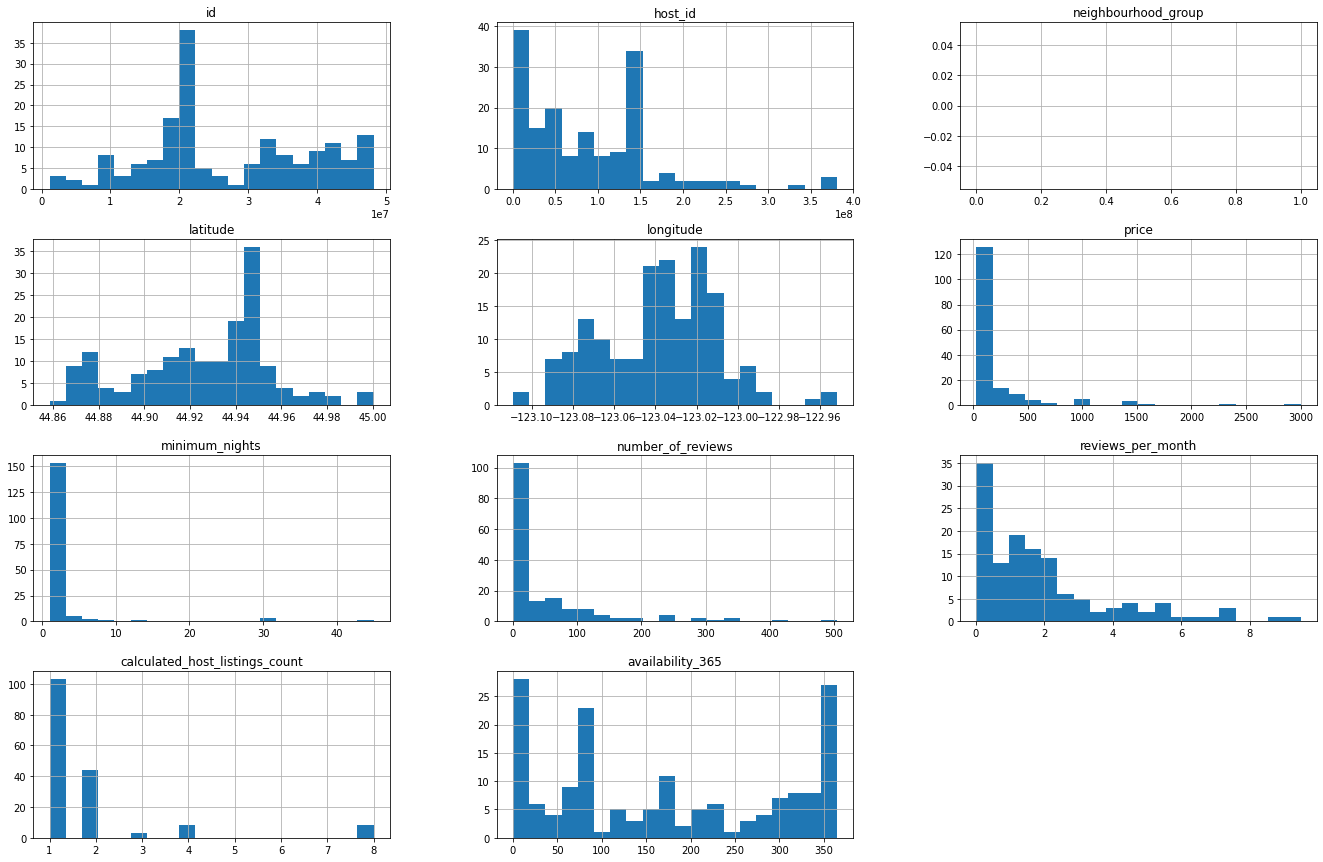

In [7]:
df.hist(bins=20, figsize=(23, 15));

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***The `id`, `host_id`, `neighbourhood_group`, and `calculated_host_listings_count` distributions have no meaning, so, we don't need to concern about their form.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***The `latitude` and `longitude` charts look close to a normal distribution with a center mean, which reflects the central characteristic of cities.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***The majority of the properties have less than a hundred reviews and receive less than 3 reviews per month.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***Most hosts allow just a few nights.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***The per-night price on the city properties is usually lower than 200 dollars.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***Plenty of the options are available just during certain seasons, but plenty of them are available almost the entire year.***

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***The `price`, `minimum_nights`, and `number_of_reviews` contains outliers who can harm the analysis or a application based on those distributions.***

Since we noticed the presence of outliers in some distributions, we need to decide what to do with them (remove, accept), which depends on the application. For looking into the values, we use `describe()`.

In [8]:
df[['price', 'minimum_nights', 'number_of_reviews']].describe()

,price,minimum_nights,number_of_reviews
count,166.000000,166.000000,166.000000
mean,231.457831,2.686747,50.349398
std,393.905012,5.211706,85.458185
min,30.000000,1.000000,0.000000
25%,69.500000,1.000000,1.000000
50%,110.500000,2.000000,14.000000
75%,174.000000,2.000000,64.000000
max,3000.000000,45.000000,505.000000


<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***We have high standard deviations, and the maximum values are way too far from the 75% mark (third percentile). YES, WE ARE FACING OUTLIERS.***

To see them we can use a boxplot.

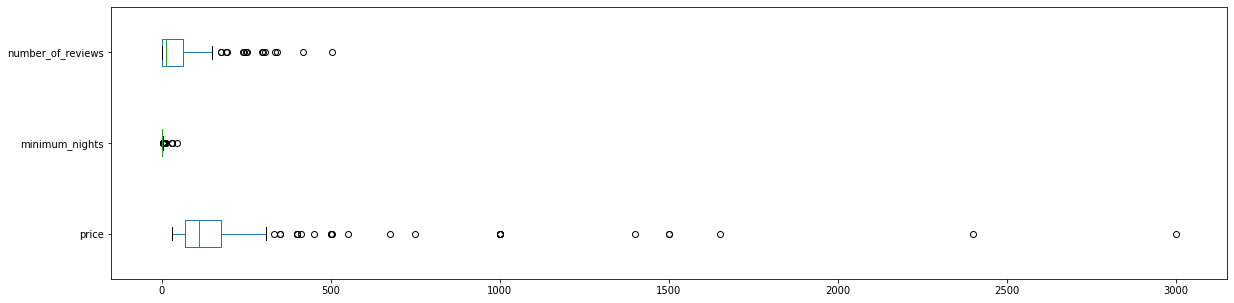

In [9]:
df[['price', 'minimum_nights', 'number_of_reviews']].plot(kind='box', vert=False, figsize=(20, 5));

As said before, founding outliers doesn't mean we got to get rid of them, once it depends on our application and if they affect it or not.

## <img width="8%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/shovel_2.png"> **Digging deeper**

If one variable is linear with another ($x_1 = a.x_2$), using both in a machine learning model, for example, can produce a biased predictor. Because of it, it is always important to look for correlation on the dataset. For it, we use `corr()`.



In [10]:
corr = df[['price', 'minimum_nights', 'number_of_reviews',
           'reviews_per_month','calculated_host_listings_count',
           'availability_365']].corr()

corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.071712,-0.212285,-0.240613,-0.140285,-0.106180
minimum_nights,-0.071712,1.000000,-0.110043,-0.157926,-0.075439,-0.044717
number_of_reviews,-0.212285,-0.110043,1.000000,0.849491,0.036020,-0.066617
reviews_per_month,-0.240613,-0.157926,0.849491,1.000000,0.039102,-0.129872
calculated_host_listings_count,-0.140285,-0.075439,0.036020,0.039102,1.000000,0.281359
availability_365,-0.106180,-0.044717,-0.066617,-0.129872,0.281359,1.000000


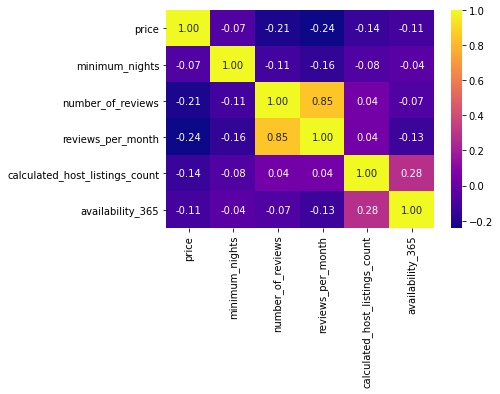

In [11]:
sns.heatmap(corr, fmt='.2f', linecolor='white', annot=True, cmap='plasma');

<img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/insight_banner.png"> ***The significant correlation value is the 85% between `reviews_per_month` and `number_of_reviews`. Both are necessarily correlated, so there is no problem with it.***

## <img width="10%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/crystal.png"> **Looks like we found some `Storytelling`**

Apparently, we dig a lot of `valuable insights`, but no idea is great enough until we tell it, so, here comes the `storytelling`.

* **How would you like to show what you discover about the data?**
* **Which idea would you like to sell?**


Well said, let's show two things:


*   ***Which kind of property is more common on the Airbnb service of Salem? How can I offer my property knowing the numbers?***
*   ***How the price is geographically distributed over the town?***



### ***Property type***

First, let's see how many we have.

In [12]:
rooms = df.room_type.value_counts()

rooms

Entire home/apt    93
Private room       71
Shared room         2
Name: room_type, dtype: int64

Just two shared rooms!!! if someone is looking for one of those, you better tell them it is hard to find another.

### ***Geographically distributed price***

With the coordinates of the properties and their prices, we can easily plot a beautiful overview of the town.

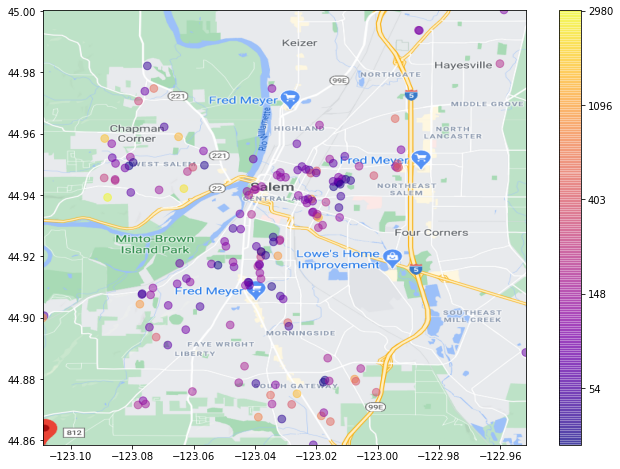

In [13]:
img = plt.imread("https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/salem.png")
fig, ax = plt.subplots(figsize=(12, 8))

limits = [df['longitude'].min(), df['longitude'].max(), df['latitude'].min(), df['latitude'].max()]

ax.imshow(img, extent=limits)
sc = ax.scatter(df['longitude'], df['latitude'], c=np.log(df['price']), alpha=0.5, cmap='plasma', s=60)
cbar = plt.colorbar(sc)
cbar.ax.set_yticklabels(np.exp([4, 5, 6, 7, 8]).astype('int32'))

plt.show()

## <img width="13%" src="https://raw.githubusercontent.com/RodrigoMarquesP/Airbnb_Data_Exploration/main/images/bottomless_pit.png"> **It's a bottomless pit**

Remember, how much you see, depends on how close you are looking, and from which angle. It means that there is always more information to extract from a dataset (if it's necessary and convenient of course).

* **What are you trying to find or assert with the data?**
* **Those found "crystals", how will you cut them? How will you show it?**